In [308]:
import random
class Sentiment:
    NEGATIVE="NEGATIVE"
    POSITIVE="POSITIVE"
    NEUTRAL="NEUTRAL"

class Review:
    def __init__(self,text,score):
        self.text=text
        self.score=score
        self.sentiment=self.get_sentiment()
        
    def get_sentiment(self):
        if self.score<2:
            return Sentiment.NEGATIVE
        if self.score==3:
            return Sentiment.NEUTRAL
        else:
            return Sentiment.POSITIVE
        
class Review_container:
    def __init__(self,reviews):
        self.reviews=reviews
        
    def get_text(self):
        return [i.text for i in self.reviews]
    def get_sentiment(self):
        return [i.sentiment for i in self.reviews]
    
    def evenly_distributed(self):
        negative=list(filter(lambda x:x.sentiment==Sentiment.NEGATIVE ,self.reviews))
        positive=list(filter(lambda x:x.sentiment==Sentiment.POSITIVE,self.reviews))
        positive_shrinked=positive[:len(negative)]
        self.reviews=negative+positive_shrinked
        random.shuffle(self.reviews)
        
        

In [309]:
reviews=[]
import json
with open(r"C:\Users\raviv\OneDrive\Documents\learning\python\sklearn\sentiment\data\Books_small_10000.json") as f:
    for line in f:
        review=json.loads(line)
        reviews.append(Review(review['reviewText'],review['overall']))
        
    

In [310]:
reviews[5].score

5.0

In [311]:
from sklearn.model_selection import train_test_split

training_data,testing_data=train_test_split(reviews,test_size=0.2,random_state=42)

In [312]:
print("length of the training data :{} lenght of the testing data :{}".format(len(training_data),len(testing_data)))

length of the training data :8000 lenght of the testing data :2000


In [313]:
# train_x=[i.text for i in training_data]
# train_y=[i.sentiment for i in training_data]
# test_x=[i.text for i in testing_data]
# test_y=[i.sentiment for i in testing_data]

train_container=Review_container(training_data)
test_container=Review_container(testing_data)
train_container.evenly_distributed()
test_container.evenly_distributed()
train_x=train_container.get_text()
train_y=train_container.get_sentiment()
test_x=test_container.get_text()
test_y=test_container.get_sentiment()

print(train_y.count(Sentiment.POSITIVE))
train_y.count(Sentiment.NEGATIVE)
print(train_x)

215
['This was a real page turner.  Debbie has an epiphany of sorts when she is on the set with her latest adult film. Returning home, she discovers her husband has died with a underaged girl. The two were electrocuted while filming the girl\'s "audition" in a hot tub. Only this could happen in Hollywood. Debbie is left with a huge debt of her husband\'s and a local thug named Richard Ness is threatening to kill her if she doesn\'t make good on the debt. Debbie, feisty and strong, pretty much tells him where to go. She decides she\'s had enough of the adult film industry and wants out. She embarks on a journey to reconnect with her family while planning her husband\'s funeral. One would think her late husband was a dog, but it turns out he really cared for Debbie and was kind to her. For all his flaws, he was a decent husband. Ness sells her debt to a mean thug named Coco Manetti, who tries to collect any way possible. Luckily Debbie discovers she has an unexpectedly powerful friend on

In [314]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
train_x_vectors= vectorizer.fit_transform(train_x)
test_x_vectors=vectorizer.transform(test_x)
# print(train_x[0])
print(vectorizer.get_feature_names_out())
print(len(vectorizer.get_feature_names_out()))
# print(train_x_vectors[500])
# print(train_x_vectors[0].toarray()[0][7434:7440])
print(test_x_vectors[0].toarray().shape)

['000' '10' '100' ... 'zionist' 'zom' 'zone']
5570
(1, 5570)


### support vector classifier

In [315]:
from sklearn import svm
svc_cls=svm.SVC(kernel='linear')


svc_cls.fit(train_x_vectors,train_y)

print(test_x[0])

svc_cls.predict(test_x_vectors[100])

This book is twisted in the abuse put forth against Sarah, by her boss Travis. It is almost a classic case of the victim falling in love with her abuser. Yes, this is abuse, due to the fact that it is not consensual with both parties. You don't force someone to marry you, especially when they are insecure with themselves and life in general.


array(['NEGATIVE'], dtype='<U8')

### decision tree classifier

In [316]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()


dt.fit(train_x_vectors,train_y)

print(test_x[0])

dt.predict(test_x_vectors[100])

This book is twisted in the abuse put forth against Sarah, by her boss Travis. It is almost a classic case of the victim falling in love with her abuser. Yes, this is abuse, due to the fact that it is not consensual with both parties. You don't force someone to marry you, especially when they are insecure with themselves and life in general.


array(['NEGATIVE'], dtype='<U8')

### navie bayes classifier 

In [317]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()


gnb.fit(train_x_vectors.toarray(),train_y)

print(test_x[0])

gnb.predict(test_x_vectors[100].toarray())

This book is twisted in the abuse put forth against Sarah, by her boss Travis. It is almost a classic case of the victim falling in love with her abuser. Yes, this is abuse, due to the fact that it is not consensual with both parties. You don't force someone to marry you, especially when they are insecure with themselves and life in general.


array(['NEGATIVE'], dtype='<U8')

### logistic regression

In [318]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(train_x_vectors,train_y)

print(test_x[0])

lr.predict(test_x_vectors[100])

This book is twisted in the abuse put forth against Sarah, by her boss Travis. It is almost a classic case of the victim falling in love with her abuser. Yes, this is abuse, due to the fact that it is not consensual with both parties. You don't force someone to marry you, especially when they are insecure with themselves and life in general.


array(['NEGATIVE'], dtype='<U8')

In [319]:
print(lr.score(test_x_vectors,test_y))
print(dt.score(test_x_vectors,test_y))
print(svc_cls.score(test_x_vectors,test_y))
print(gnb.score(test_x_vectors.toarray(),test_y))

0.8055555555555556
0.6388888888888888
0.7592592592592593
0.6203703703703703


In [320]:
from sklearn.metrics import f1_score
f1_score(test_y,lr.predict(test_x_vectors),average=None,labels=[Sentiment.POSITIVE,Sentiment.NEGATIVE])
f1_score(test_y,dt.predict(test_x_vectors),average=None,labels=[Sentiment.POSITIVE,Sentiment.NEGATIVE])
f1_score(test_y,gnb.predict(test_x_vectors.toarray()),average=None,labels=[Sentiment.POSITIVE,Sentiment.NEGATIVE])
f1_score(test_y,svc_cls.predict(test_x_vectors.toarray()),average=None,labels=[Sentiment.POSITIVE,Sentiment.NEGATIVE])

array([0.75471698, 0.76363636])

In [321]:
test_set=['i thoroughly enjoyed this,5 stars',"not good book do not buy ","horrible waste of time"]
new_test=vectorizer.transform(test_set)

lr.predict(new_test)

array(['POSITIVE', 'NEGATIVE', 'NEGATIVE'], dtype='<U8')

In [322]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [323]:
from sklearn.model_selection import GridSearchCV
import time
import numpy as np
parameters = {'criterion':['gini','entropy'],
              'splitter':['best','random'],
            #   'random_state':np.arange(0,100).tolist()[0::10],
              'ccp_alpha':np.arange(0,10).tolist()[0::1]}

dt= GridSearchCV(DecisionTreeClassifier(), parameters, cv=10, n_jobs=-1)


start_time = time.time()
dt.fit(train_x_vectors,train_y)
duration = time.time() - start_time


cls_params1 = dt.best_params_
cls_params1

{'ccp_alpha': 0, 'criterion': 'entropy', 'splitter': 'random'}

In [332]:
dt.best_params_


dt.fit(train_x_vectors,train_y)

print(test_x[0])

dt.predict(test_x_vectors[100])



This book is twisted in the abuse put forth against Sarah, by her boss Travis. It is almost a classic case of the victim falling in love with her abuser. Yes, this is abuse, due to the fact that it is not consensual with both parties. You don't force someone to marry you, especially when they are insecure with themselves and life in general.


array(['POSITIVE'], dtype='<U8')

In [333]:
print(dt.score(test_x_vectors,test_y))

0.6851851851851852


### saving the model

In [307]:
import pickle
import joblib

with open(r"C:\Users\raviv\OneDrive\Documents\learning\python\sklearn\sentiment\models\svc_pickle.pkl",'wb') as f:
    pickle.dump(svc_cls,f)

joblib.dump(svc_cls,'./sentiment/models/svc_joblib.pkl')

['./sentiment/models/svc_joblib.pkl']

In [301]:
pwd

'c:\\Users\\raviv\\OneDrive\\Documents\\learning\\python\\sklearn'

In [293]:
with  open(r"C:\Users\raviv\OneDrive\Documents\learning\python\sklearn\sentiment\models\dt_pickle.pkl","rb") as f:
    loaded_model=pickle.load(f)

In [294]:
loaded_model.predict(new_test)

array(['POSITIVE', 'NEGATIVE', 'NEGATIVE'], dtype='<U8')

In [297]:
dt_model=joblib.load(r"C:\Users\raviv\OneDrive\Documents\learning\python\sklearn\sentiment\models\dt_joblib.pkl")

In [298]:
dt_model.predict(new_test)

array(['POSITIVE', 'NEGATIVE', 'NEGATIVE'], dtype='<U8')

<AxesSubplot:>

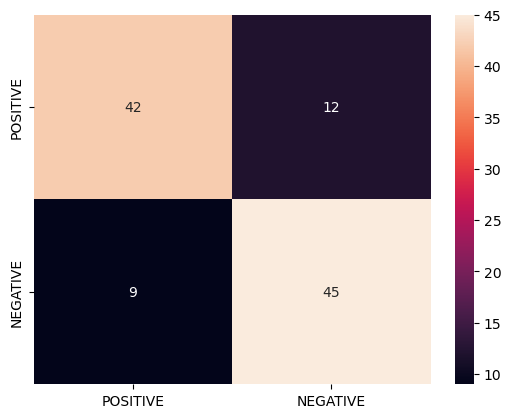

In [376]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import pandas as pd
labels=[Sentiment.POSITIVE,Sentiment.NEGATIVE]
ypred=lr.predict(test_x_vectors)

cm=confusion_matrix(test_y,ypred,labels=labels)
df_cm=pd.DataFrame(cm,index=labels,columns=labels)
sns.heatmap(df_cm,annot=True,fmt='d')


In [374]:
count=0
for i in range(len(ypred)):
    if ypred[i]==test_y[i] and ypred[i]=='NEGATIVE':
        count=count+1
print(count)

45


In [366]:
len(ypred)

108

In [367]:
df_cm

,POSITIVE,NEGATIVE
POSITIVE,42,12
NEGATIVE,9,45


In [375]:
cm

array([[42, 12],
       [ 9, 45]], dtype=int64)